In [1]:
import numpy as np
from skimage import io
from matplotlib import pyplot as plt

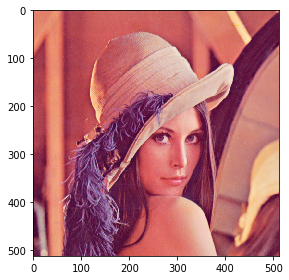

In [2]:
image = io.imread('Lena.tiff')
io.imshow(image)

In [3]:
rows, columns, dimensions = image.shape
img = io.imread(r'F16.tiff', 0)
img

array([[[181,   0,  98, 255],
        [128, 211, 204, 255],
        [160, 205, 196, 255],
        ...,
        [168, 159, 200, 255],
        [159, 166, 199, 255],
        [131, 147, 196, 255]],

       [[141,   0, 114, 255],
        [188, 185, 201, 255],
        [187, 179, 195, 255],
        ...,
        [209, 210, 217, 255],
        [215, 220, 220, 255],
        [137, 171, 205, 255]],

       [[205,   0, 200, 255],
        [168, 168, 196, 255],
        [159, 153, 188, 255],
        ...,
        [176, 177, 200, 255],
        [156, 166, 197, 255],
        [193, 194, 207, 255]],

       ...,

       [[223,   0, 216, 255],
        [201, 204, 204, 255],
        [201, 204, 203, 255],
        ...,
        [106, 118, 171, 255],
        [132, 127, 170, 255],
        [211, 213, 212, 255]],

       [[218,   0, 215, 255],
        [205, 209, 206, 255],
        [206, 210, 208, 255],
        ...,
        [124, 119, 161, 255],
        [158, 150, 177, 255],
        [207, 208, 208, 255]],

       [[200

In [4]:
img.shape

(124, 152, 4)

In [5]:
#total bits required to store the image
img.shape[0]*img.shape[1]*img.shape[2]*8

603136

In [6]:
print(rows*columns*dimensions)

786432


In [7]:
count = 0
s = []
for i in range(img.shape[0]):
    for j in range(img.shape[1]):
        for ch in range(img.shape[2]):
            s.append(str(img[i,j,ch]))
            count +=1
s = ','.join(s)
count

75392

In [8]:
print(s)

181,0,98,255,128,211,204,255,160,205,196,255,182,210,200,255,182,208,199,255,193,207,194,255,194,197,194,255,141,207,193,255,111,201,189,255,101,193,184,255,88,201,197,255,93,198,196,255,109,190,192,255,107,197,191,255,98,203,193,255,85,192,188,255,84,194,192,255,87,201,194,255,95,190,189,255,88,186,188,255,92,194,200,255,123,192,196,255,131,197,200,255,109,191,196,255,115,201,201,255,122,194,199,255,123,189,197,255,123,189,197,255,100,196,205,255,100,188,199,255,102,189,201,255,93,188,197,255,98,188,203,255,106,191,204,255,108,193,197,255,121,184,198,255,124,194,203,255,126,194,206,255,121,190,203,255,108,193,202,255,99,195,204,255,94,194,204,255,107,194,206,255,126,193,207,255,129,194,207,255,123,194,209,255,111,192,203,255,84,199,208,255,159,195,207,255,148,188,203,255,144,195,205,255,146,196,210,255,142,189,205,255,139,181,201,255,133,185,202,255,129,194,205,255,130,176,194,255,142,180,202,255,144,183,199,255,153,180,198,255,148,180,197,255,140,180,193,255,80,186,198,255,76,188,203

In [9]:
def to_bits(s):
    result = []
    for c in s:
        bits = bin(ord(c))[2:]
        bits= '00000000'[len(bits):]+bits
        result.extend(int(b) for b in bits)
    return result

In [10]:
img_bits = to_bits(s)
# print(img_bits)

In [11]:
img_len = len(img_bits)
img_len

2373016

In [12]:
l = to_bits(str(img_len))
print(l)

[0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 1, 0]


In [13]:
l_len = len(l)
l_len

56

In [14]:
im_lsb = np.zeros(image.shape)
for i in range(0,512):
    for j in range(0,512):
        im_lsb[i][j] = image[i,j,0] & 1

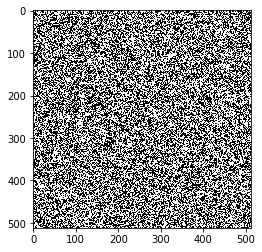

In [15]:
plt.imshow((im_lsb), cmap='gray')

In [16]:
new_image = np.copy(image)
i = 0
lim = image.shape[1] - l_len -1
j = lim
# j = 512 - 1 - 32
# j = image.shape[1] - 1
channel = 0
for bit in l:
    new_image[i, j, channel] = (new_image[i, j, channel] & ~1) | bit
    j += 1
j = 0
while(j < lim):
    new_image[i, j, channel] = (new_image[i, j, channel] & 0)
    j += 1
io.imsave('Image_encoded_lena.tiff', new_image)

In [17]:
i = 1
j = 0
channel = 0
for bit in img_bits:
    new_image[i, j, channel] = (new_image[i, j, channel] & ~1) | bit
    j += 1
    if j == columns:
        j = 0
        i += 1
    if i == rows:
        i = 0
        channel += 1
    if channel == 3:
        break
io.imsave('Image_encoded_lena.tiff', new_image)

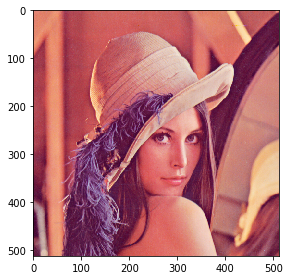

In [18]:
io.imshow('Image_encoded_lena.tiff')

In [19]:
nim_lsb = np.zeros(new_image.shape)
for i in range(0,512):
    for j in range(0,512):
        nim_lsb[i][j] = new_image[i,j,0] & 1

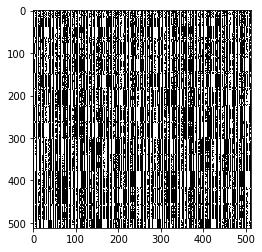

In [20]:
plt.imshow((nim_lsb), cmap='gray')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


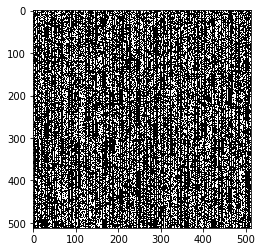

In [21]:
plt.imshow((im_lsb-nim_lsb), cmap='gray')